### Homework 2 - Question 1 - Luke Arend

In [52]:
import scipy
obj = scipy.io.loadmat('mt2files/colMatch.mat')

### a)

In [64]:
primaries = obj['P']

In [55]:
from mt2files.trichromacy import human_color_matcher

Produce a testlight.

In [114]:
import numpy as np
test_spectrum = np.random.rand(31)

Have human run an experiment, producing knob settings.

In [115]:
knob_settings = human_color_matcher(test_spectrum, primaries)
knob_settings

array([[ 0.94891366],
       [-0.25289918],
       [ 1.00937408]])

Compute the spectrum for this knob setting. It is a metamer for the test light because it appears the same to a human.

In [119]:
metamer_spectrum = np.dot(primaries, knob_settings)

In [120]:
import pandas as pd
df = pd.DataFrame({
    'Test spectrum': test_spectrum,
    'Metamer spectrum': np.squeeze(metamer_spectrum)
})
df.index = np.linspace(400, 700, 31)

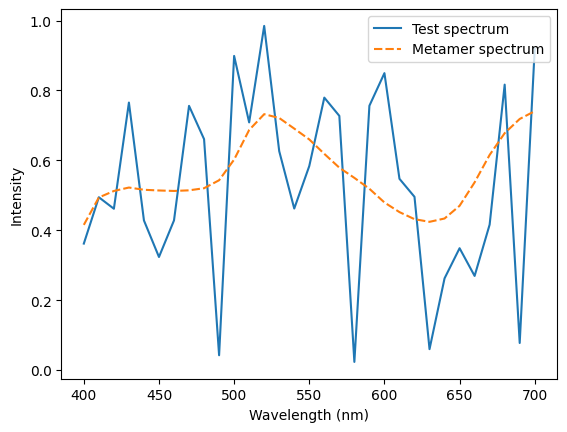

In [121]:
import seaborn as sns
sns.lineplot(df)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()

# TODO: explain why the two spectra are so different, even though they appear the same to the human

### b)

If we treat the system as linear, we can characterize its response to any vector by characterizing its response to the standard basis.

In [122]:
testlights = np.identity(31)

In [128]:
M = human_color_matcher(testlights, P)

Verify that `M` predicts the human response on 5 random test lights.

In [141]:
testlights = np.random.rand(31, 5)

In [154]:
predicted_responses = np.dot(M, testlights)

In [150]:
actual_responses = human_color_matcher(testlights, P)

In [153]:
np.allclose(predicted_responses, actual_responses)

True

### c)

We can plot the spectral sensitivies for three different color photoreceptors.

In [162]:
cones = obj['Phosphors'].T
df = pd.DataFrame({
    'L': cones[0, :],
    'M': cones[1, :],
    'S': cones[2, :]
})
df.index = np.linspace(400, 700, 31)

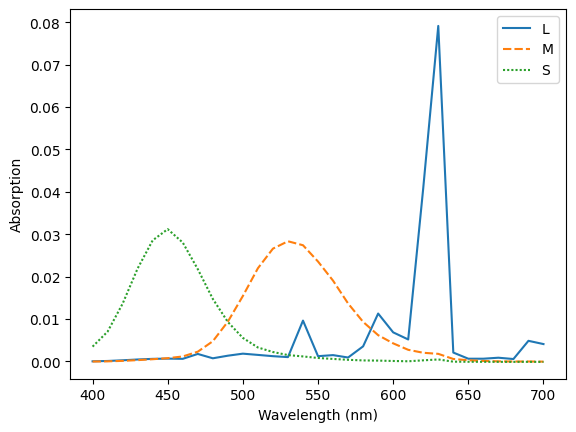

In [170]:
sns.lineplot(df)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption')
plt.show()

In [223]:
test_spectrum = np.random.rand(31)
knob_settings = human_color_matcher(test_spectrum, primaries)
metamer_spectrum = np.dot(primaries, knob_settings)

test_response = np.dot(cones, test_spectrum)
metamer_response = np.dot(cones, metamer_spectrum)

In [224]:
test_response

array([0.07681134, 0.14373376, 0.11008222])

In [225]:
metamer_response

array([[0.09333094],
       [0.14768519],
       [0.10882208]])

# TODO: stuck here, the absorptions are not the same. Numerical error?

### 4)

In [229]:
from mt2files.trichromacy import alt_human_color_matcher

In [244]:
test_spectrum = np.random.rand(31)
normal_knobs = human_color_matcher(test_spectrum, primaries)
alt_knobs = alt_human_color_matcher(test_spectrum, primaries)

# TODO: i) how do knob settings for alt observer differ with those of normal human?

In [246]:
normal_metamer = np.dot(primaries, normal_knobs)
alt_metamer = np.dot(primaries, alt_knobs)

In [247]:
normal_absorptions = np.dot(cones, normal_metamer)

In [248]:
alt_absorptions = np.dot(cones, alt_metamer)

In [249]:
normal_absorptions

array([[0.0881485 ],
       [0.14643671],
       [0.10388183]])

In [250]:
alt_absorptions

array([[-0.02330884],
       [ 0.2347636 ],
       [ 0.10801423]])

# TODO: ii) how do cone responses of normal and alt observers differ? can you diagnose the underlying cause of color deficiency in alt observer?